In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Microsoft-Machine-Learning-Engineer-DEPI-Round4\Data\diabetes.csv")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:

df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols:
    print(col, (df[col] == 0).sum())


Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [10]:
import numpy as np

df[cols] = df[cols].replace(0, np.nan)

df.fillna(df.median(), inplace=True)


In [ ]:
import plotly.express as px
# Glucose Distribution by Outcome
fig = px.histogram(df, x="Glucose", color="Outcome", nbins=30,
                   title="Distribution of Glucose by Diabetes Outcome",
                   barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()


In [12]:
fig = px.histogram(df, x="Outcome", title="Diabetes Outcome Distribution")
fig.show()

In [13]:
for col in ['Glucose', 'BMI', 'Age', 'Insulin']:
    fig = px.box(df, x="Outcome", y=col, color="Outcome",
                 title=f"{col} Distribution by Diabetes Outcome")
    fig.show()


In [14]:
fig = px.scatter_matrix(df,
                        dimensions=["Glucose", "BMI", "Age", "Insulin"],
                        color="Outcome",
                        title="Scatter Matrix of Key Features")
fig.update_traces(diagonal_visible=False)
fig.show()


In [15]:
import plotly.figure_factory as ff

corr = df.corr().round(2)
z = corr.values
x = list(corr.columns)
y = list(corr.index)

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='RdBu', showscale=True)
fig.update_layout(title="Correlation Heatmap")
fig.show()


In [ ]:
#Strongest correlations with Outcome: Glucose, BMI, and Age

In [16]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100],
                        labels=['20-30','31-40','41-50','51-60','60+'])

fig = px.histogram(df, x='AgeGroup', color='Outcome', barmode='group',
                   title='Diabetes Outcome by Age Group')
fig.show()


In [ ]:
#Young age group (20–30) has the lowest diabetes rate

<Axes: xlabel='Outcome', ylabel='count'>

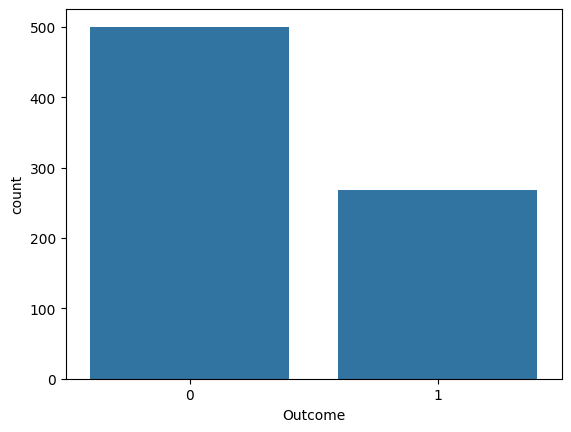

In [17]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)

<Axes: xlabel='Age', ylabel='Count'>

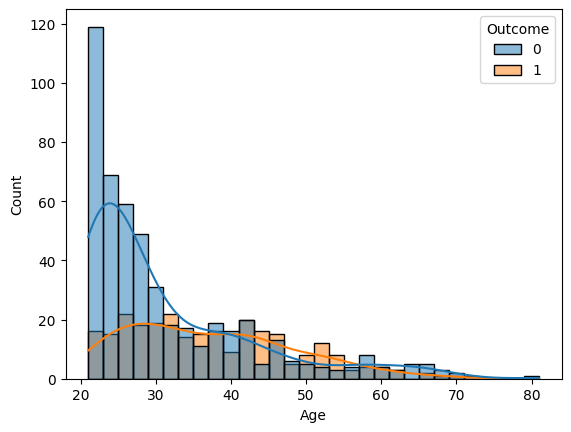

In [18]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, bins=30)


<Axes: xlabel='Glucose', ylabel='BMI'>

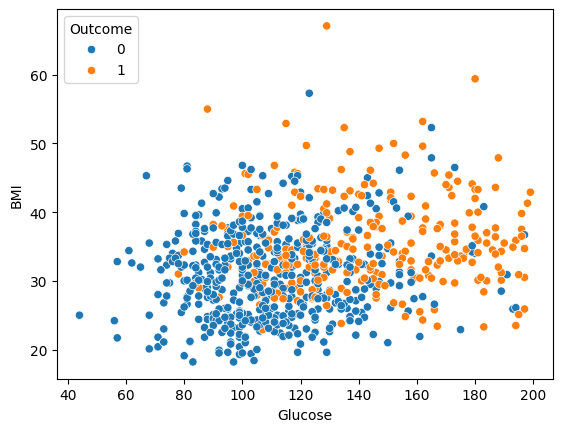

In [19]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')


In [ ]:
#High BMI + High Glucose correlates with diabetes.

In [22]:
import matplotlib.pyplot as plt


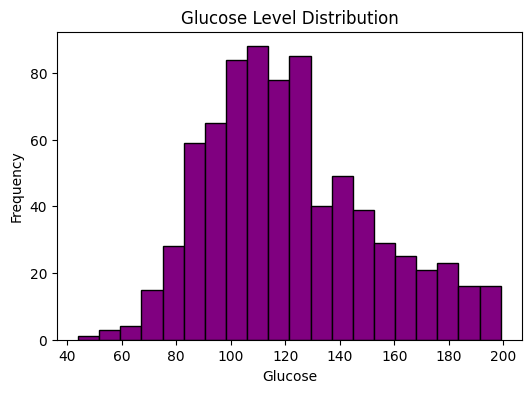

In [23]:
#Histogram of Glucose Levels

plt.figure(figsize=(6, 4))
plt.hist(df['Glucose'], bins=20, color='purple', edgecolor='black')
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

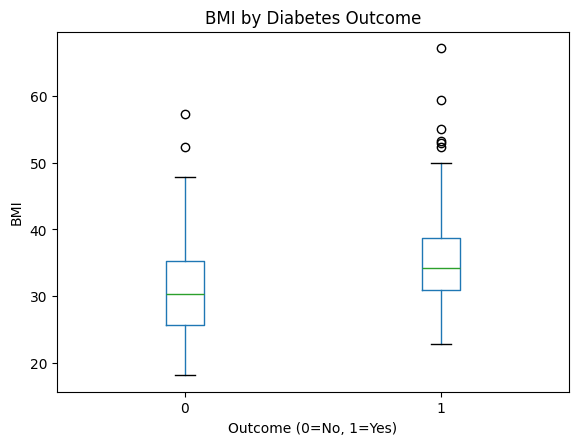

In [24]:
#Boxplot of BMI Grouped by Outcome

df.boxplot(column='BMI', by='Outcome', grid=False)
plt.title('BMI by Diabetes Outcome')
plt.suptitle('')  # remove default title
plt.xlabel('Outcome (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

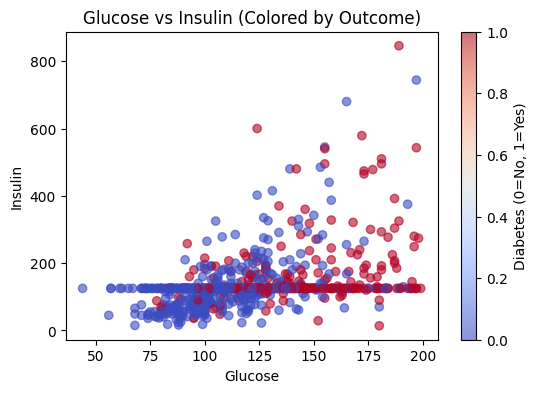

In [25]:
#Scatter Plot: Glucose vs. Insulin

plt.figure(figsize=(6, 4))
plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'], cmap='coolwarm', alpha=0.6)
plt.title('Glucose vs Insulin (Colored by Outcome)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.colorbar(label='Diabetes (0=No, 1=Yes)')
plt.show()

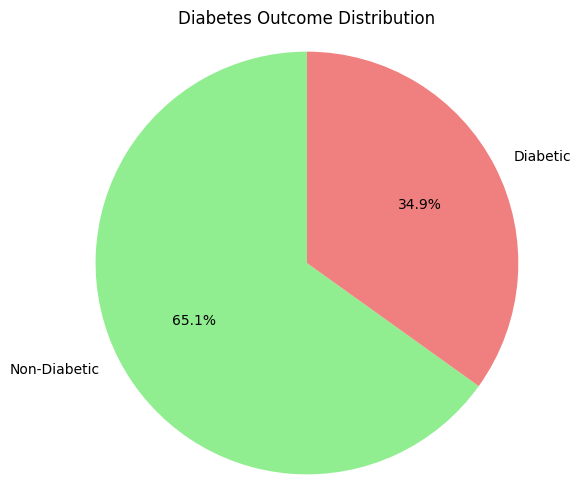

In [26]:

outcome_counts = df['Outcome'].value_counts()


labels = ['Non-Diabetic', 'Diabetic']
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Outcome Distribution')
plt.axis('equal')
plt.show()

In [28]:
df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0,18.5,25,30,100],
    labels=["Underweight","Normal","Overweight","Obese"]
)
fig = px.histogram(df, x="BMI_Category", color="Outcome", barmode='group',
                   title="Diabetes Outcome by BMI Category")
fig.show()

In [29]:
df["Insulin_Glucose_Ratio"] = df["Insulin"] / (df["Glucose"] + 1e-5)
fig = px.box(df, x="Outcome", y="Insulin_Glucose_Ratio", color="Outcome",
                 title="Insulin/Glucose Ratio by Diabetes Outcome") 
fig.show()

🔹Insight 1: Glucose is the Primary Risk Driver

- Glucose shows the strongest correlation with diabetes outcome.
Patients with high glucose levels are significantly more likely to be diabetic.

🔹 Insight 2: Obesity Amplifies Risk

- BMI and engineered Glucose_BMI interaction confirm that obesity intensifies diabetes probability.

🔹 Insight 3: Age as a Secondary Risk Factor

- Older age groups show higher diabetes prevalence.

🔹 Insight 4: Dataset Contains Hidden Data Quality Issues

- Zero values in physiological measurements indicate missing medical data rather than true zeros.

🔹 Insight 5: Combined Risk Factors Outperform Single Metrics

- Interaction features provide clearer separation between diabetic and non-diabetic cases.

## Final Conclusion

- The analysis confirms that glucose level is the most critical predictor of diabetes in this dataset.

- Obesity and age further increase risk, particularly when combined with elevated glucose levels.

- Feature engineering significantly enhanced interpretability and revealed interaction effects that improve classification performance.

- Future work should include building a predictive machine learning model to support early diabetes detection in clinical settings.
